In [1]:
# notebooks/eda_themes.ipynb

# Cell 1: Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

os.makedirs('../plots/figures', exist_ok=True)

results = pd.read_csv('../data/processed/thematic_results.csv')
summary = pd.read_csv('../data/processed/theme_summary.csv')
summary_pct = pd.read_csv('../data/processed/theme_summary_percentage.csv')

print('First 20 rows of thematic_results.csv:')
print(results.head(20))
print('\nLast 20 rows of thematic_results.csv:')
print(results.tail(20))
print('\nTheme summary (counts):')
print(summary)
print('\nTheme summary (percentages):')
print(summary_pct)


First 20 rows of thematic_results.csv:
    review_id                                             review  rating  \
0           1  everytime you uninstall the app you have to re...       1   
1           2                       Best Mobile Banking app ever       5   
2           3  it was good app but it have some issues like i...       2   
3           4                                          very niec       5   
4           5                                best app of finance       5   
5           6                               Engida Kebede Fetera       5   
6           7                                   it is not safety       1   
7           8                                          NICE bank       5   
8           9  it is like a childish app make it better the w...       1   
9          10  It's a problem solver application, go ahead CB...       5   
10         11  It's good but try to make it facilitate for yo...       4   
11         12                                    

In [3]:
# Cell 2: Theme coverage
coverage_pct = (results['theme'] != 'none').mean() * 100
print(f'\nTheme Coverage: {coverage_pct:.2f}% reviews assigned to themes')



Theme Coverage: 90.06% reviews assigned to themes


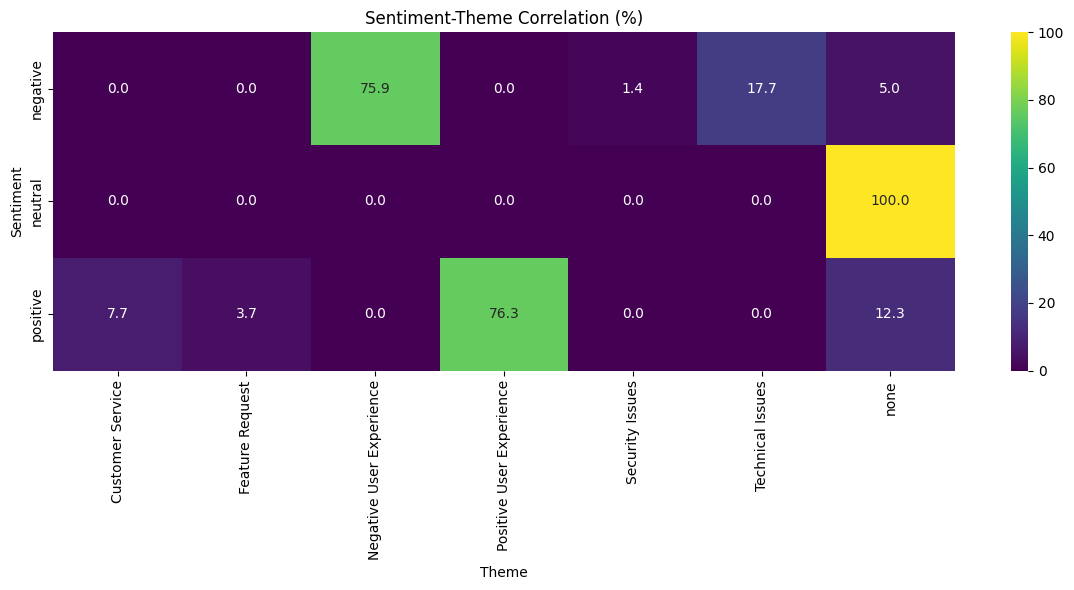

Saved sentiment-theme correlation heatmap to ../plots/figures/sentiment_theme_correlation.png


In [5]:
# Cell 3: Sentiment-theme correlation
sentiment_theme = pd.crosstab(results['sentiment'], results['theme'], normalize='index') * 100
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_theme, annot=True, cmap='viridis', fmt='.1f')
plt.title('Sentiment-Theme Correlation (%)')
plt.xlabel('Theme')
plt.ylabel('Sentiment')
plt.tight_layout()
plt.savefig('../plots/figures/sentiment_theme_correlation.png')
plt.show()
print('Saved sentiment-theme correlation heatmap to ../plots/figures/sentiment_theme_correlation.png')


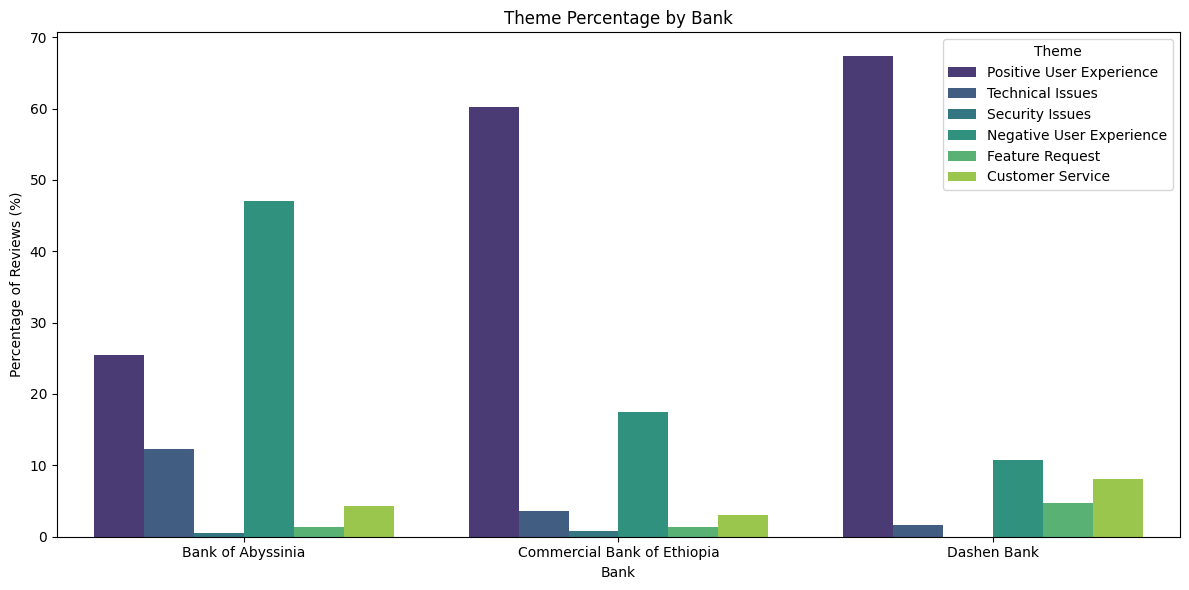

Saved theme percentage plot to ../plots/figures/theme_percentage.png


In [6]:
# Cell 4: Theme percentage per bank
summary_pct_melt = summary_pct.melt(id_vars=['bank'], 
    value_vars=['Positive User Experience', 'Technical Issues', 'Security Issues', 'Negative User Experience', 'Feature Request', 'Customer Service'], 
    var_name='Theme', value_name='Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(data=summary_pct_melt, x='bank', y='Percentage', hue='Theme', palette='viridis')
plt.title('Theme Percentage by Bank')
plt.xlabel('Bank')
plt.ylabel('Percentage of Reviews (%)')
plt.legend(title='Theme')
plt.tight_layout()
plt.savefig('../plots/figures/theme_percentage.png')
plt.show()
print('Saved theme percentage plot to ../plots/figures/theme_percentage.png')


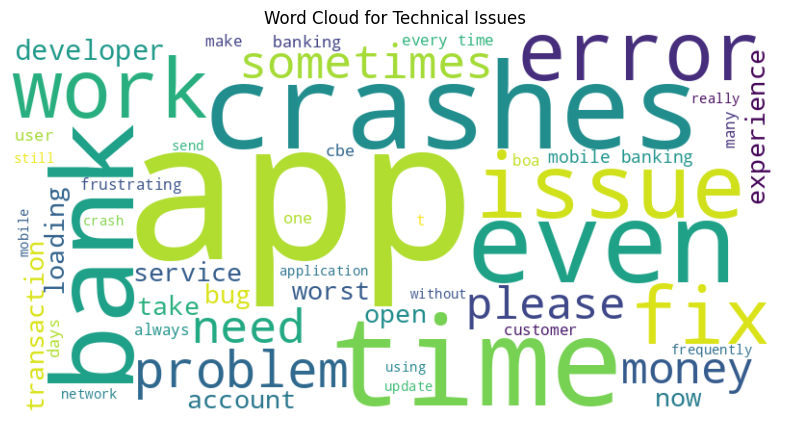

Saved word cloud to ../plots/figures/wordcloud_technical_issues.png


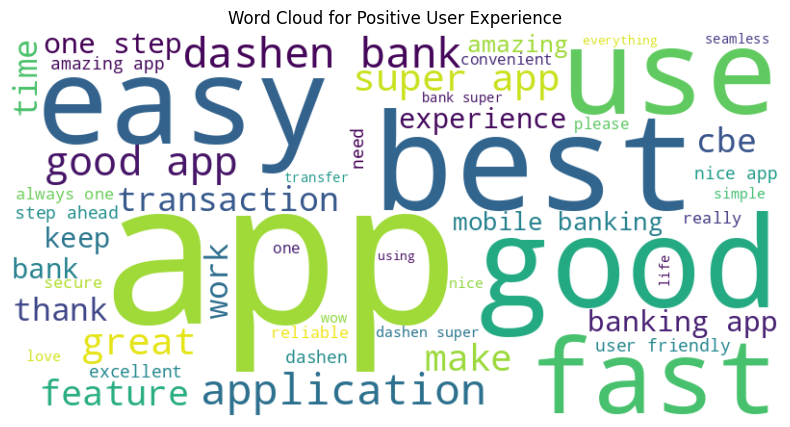

Saved word cloud to ../plots/figures/wordcloud_positive_user_experience.png


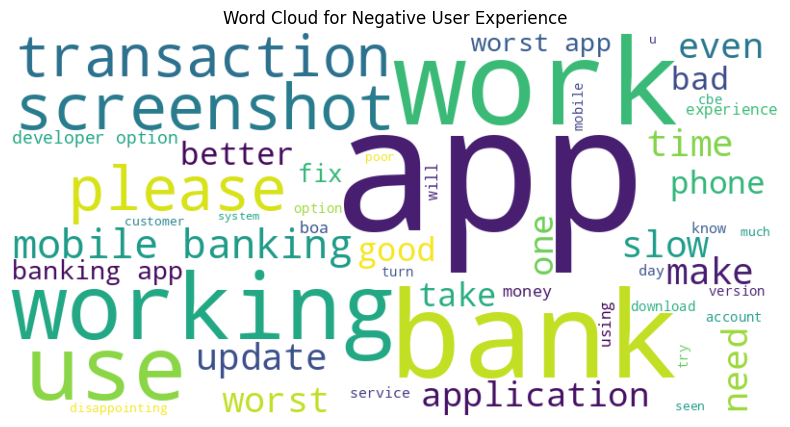

Saved word cloud to ../plots/figures/wordcloud_negative_user_experience.png


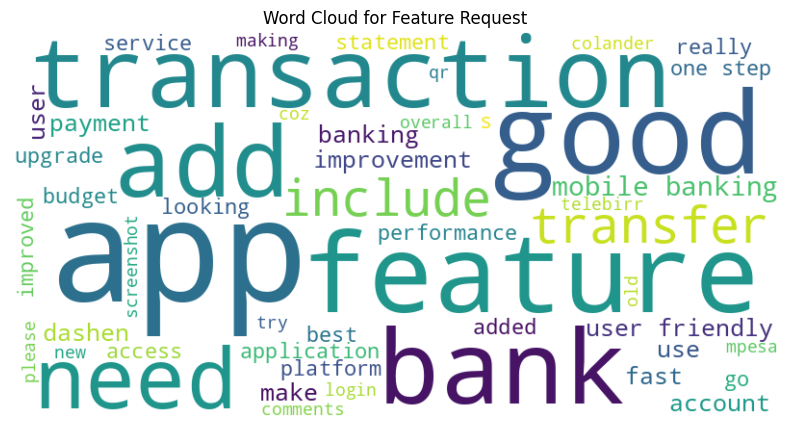

Saved word cloud to ../plots/figures/wordcloud_feature_request.png


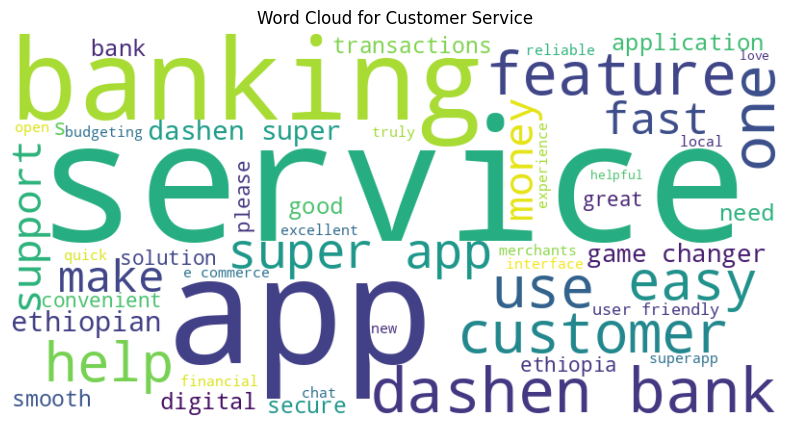

Saved word cloud to ../plots/figures/wordcloud_customer_service.png


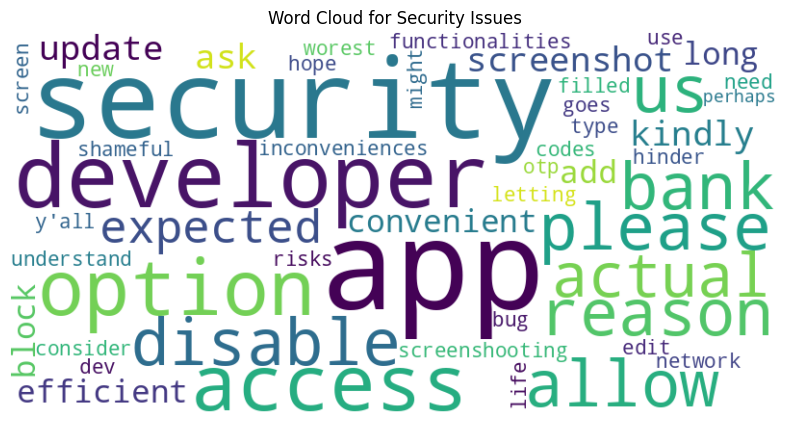

Saved word cloud to ../plots/figures/wordcloud_security_issues.png


In [7]:
# Cell 5: Word clouds
themes = results['theme'].unique()
for theme in themes:
    if theme == 'none':
        continue
    theme_reviews = results[results['theme'] == theme]['review'].dropna().str.lower()
    if not theme_reviews.empty:
        text = ' '.join(theme_reviews)
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {theme}')
        plt.savefig(f'../plots/figures/wordcloud_{theme.lower().replace(" ", "_")}.png')
        plt.show()
        print(f'Saved word cloud to ../plots/figures/wordcloud_{theme.lower().replace(" ", "_")}.png')


In [8]:
# Cell 6: LDA visualization note
print('Interactive LDA topic visualization saved at data/processed/lda_topics.html')
print('Open in a browser to inspect topic separation and word relevance.')


Interactive LDA topic visualization saved at data/processed/lda_topics.html
Open in a browser to inspect topic separation and word relevance.
